# Lunares: 7 lesiones

En este problema de clasificación de lunares hay 7 clases:

* Clase 0: 'akiec' - actinic keratosis

* Clase 1: 'bcc' - basal cell carcinoma

* Clase 2: 'bkl' - benign keratosis

* Clase 3: 'df' - dermatofibroma

* Clase 4: 'mel' - melanoma

* Clase 5: 'nv' - melanocytic nevus

* Clase 6: 'vasc' - vascular lesion

El ejemplo presenta dos bases de datos y es necesario escoger uno de ellos:.


* Reduced dataset: con algunas imágenes de gatos y perros para realizar un entrenamiento más rápido (pero menos efectivo). Para este conjunto se recomienda una CNN simple (de pocas capas, ver modelo para "reduced dataset").

* Full dataset: con un conjunto mayor de imágenes de gatos y perros que se usa para entrenar un modelo más efectivo (con mejor accuracy) pero con un entrenamiento más lento. Para este conjunto se recomienda una CNN compleja (de más capas, ver modelo para "large dataset").


Interesante en este ejemplo es que los conjuntos de datos de training, validation y testing están pre-definidos y no se escogen de manera aleatoria. Cada uno de estos tres conjuntos se encuentra en una carpeta específica. Esta información es definida con la función `ImageLoader`.



Referencia: [CNN Model With PyTorch For Image Classification](https://medium.com/thecyphy/train-cnn-model-with-pytorch-21dafb918f48), by Pranjal Soni (Medium)

In [ ]:
!wget https://www.dropbox.com/s/6ynmxv6mizs53ie/exp4val.zip?dl=0
!unzip -qq exp4val.zip

--2021-05-31 23:08:21--  https://www.dropbox.com/s/q4ujw8539io02gt/exp4val.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/q4ujw8539io02gt/exp4val.zip [following]
--2021-05-31 23:08:21--  https://www.dropbox.com/s/raw/q4ujw8539io02gt/exp4val.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc6e6a8528aae506736df1a9f4a6.dl.dropboxusercontent.com/cd/0/inline/BPiHDKJMpzADOpKkNsDMjUE8tnlOgQPsN4aq1LLtXh7gqF-i4XFWt96Q0jXfuwQ4VHXUc66iVOP1Y3Z7ZUk2DJsLlaVPbuBYwgoqg7sNLx8nlyM9uX2ueWptCASP05iJDYn4jEg5XCvZcNxiwNQmN5eZ/file# [following]
--2021-05-31 23:08:21--  https://uc6e6a8528aae506736df1a9f4a6.dl.dropboxusercontent.com/cd/0/inline/BPiHDKJMpzADOpKkNsDMjUE8tnlOgQPsN4aq1LLtXh7gqF-i4XFWt96Q0jXfuwQ4VHXUc66iVOP1Y3Z7ZUk2DJsLlaVPb

In [1]:
import torch
import torchvision
from   torchvision import transforms
from   torchvision.datasets import ImageFolder
from   torch.utils.data.dataloader import DataLoader
from   torch.utils.data import random_split
from   sklearn.metrics import confusion_matrix, accuracy_score

#train and test data directory

train_dir = "train/"
val_dir   = "val/"
test_dir  = "test/"

#load the train and test data
train_set = ImageFolder(train_dir,transform = transforms.Compose([
    transforms.Resize((64,64)),transforms.RandomHorizontalFlip(),transforms.ToTensor()]))

val_set = ImageFolder(val_dir,transform = transforms.Compose([
    transforms.Resize((64,64)),transforms.ToTensor()]))

test_set = ImageFolder(test_dir,transforms.Compose([
    transforms.Resize((64,64)),transforms.ToTensor()]))

img,_ = train_set[0]
print('Size image: '+ str(img.shape))
print('   Classes: ',train_set.classes)

Size image: torch.Size([3, 64, 64])
   Classes:  ['class_0', 'class_1', 'class_2', 'class_3', 'class_4', 'class_5', 'class_6']


In [2]:
#!wget https://www.dropbox.com/s/caz30t81td7zxgl/cnn_utils.py?dl=0
from cnn_utils import *
print('cnn_utils module has been loaded')

cnn_utils module has been loaded


Image: 1125, Label : class_1


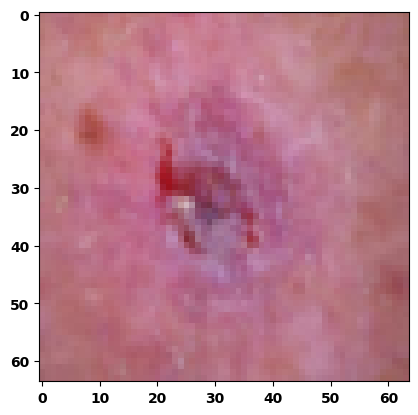

In [3]:
#display an image in the training dataset
display_img(train_set,1125)

In [4]:
#load the train and validation into batches.

batch_size = 150 

print(f"Length of Train Data : {len(train_set)}")
print(f"Length of Validation Data : {len(val_set)}")

train_dl = DataLoader(train_set, batch_size, shuffle = True, num_workers = 2, pin_memory = True)
val_dl   = DataLoader(val_set  , batch_size, num_workers = 4, pin_memory = True)

Length of Train Data : 7350
Length of Validation Data : 1050


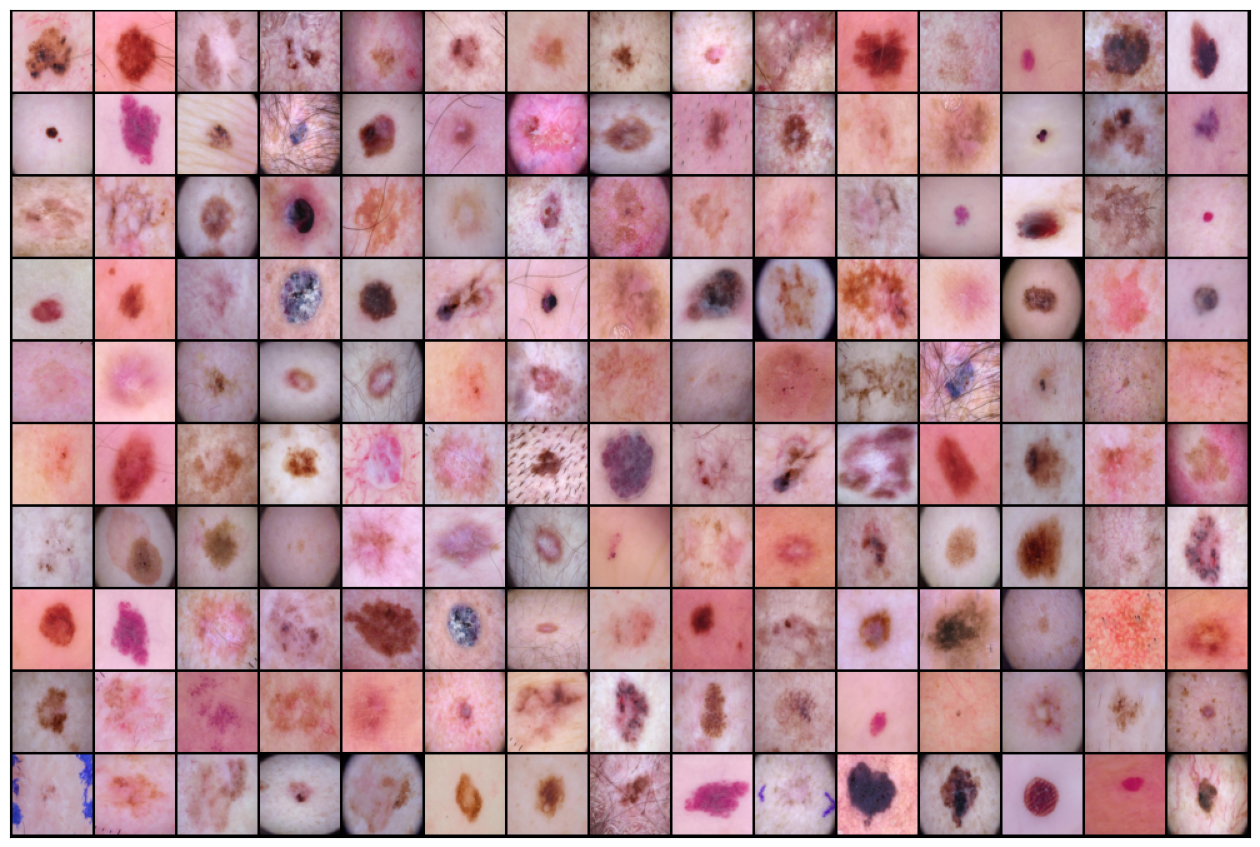

In [5]:
show_batch(train_dl,nrow=15)

In [6]:
# Reduced Model
class CNN_Classification(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            
            nn.Conv2d(3, 8, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.Conv2d(8,16, kernel_size = 3, stride = 2, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),            

            nn.Conv2d(16, 32, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.Conv2d(32,32, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),            

            nn.Flatten(),
            nn.Linear(2048,1024),
            nn.Linear(1024,128),
            nn.Linear(128,7),
            nn.Dropout(0.25)
        )
    
    def forward(self, xb):
        return self.network(xb)


In [7]:
# Large Model
class CNN_Classification(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            
            nn.Conv2d(3, 32, kernel_size = 3, padding = 1),
            nn.ReLU(),
            nn.Conv2d(32,64, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
        
            nn.Conv2d(64, 128, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.Conv2d(128 ,128, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            
            nn.Conv2d(128, 256, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.Conv2d(256,256, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            
            nn.Flatten(),
            nn.Linear(16384,128), #1024
            nn.ReLU(),
            nn.Linear(128, 64), #512
            nn.ReLU(),
            nn.Linear(64,7) #6
        )
    
    def forward(self, xb):
        return self.network(xb)


In [8]:
model =  CNN_Classification()
print(model)

CNN_Classification(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Flatten(start_dim=1, end_dim=-1)
    (16): Linear(in_features=16384, out_features=128, bias=True)
    (17): ReLU()
    (18): Linear(in_f

In [9]:
#fitting the model on training data and record the result after each epoch
num_epochs = 100
opt_func   = torch.optim.Adam
lr         = 0.0005
history    = fit(num_epochs, lr, model, train_dl, val_dl, opt_func)

Epoch    Train-Loss   Val-Loss    Val-Acc   Best    Time [sec]
------------------------------------------------------------------
    0      1.9232      1.7900      0.2857    ***     255.4 
    1      1.7053      1.6734      0.3029    ***     278.8 
    2      1.6173      1.6519      0.3057    ***     256.4 
    3      1.5084      1.4143      0.3971    ***     253.7 
    4      1.3115      1.3220      0.4429    ***     271.1 
    5      1.2135      1.3463      0.4705    ***     299.8 
    6      1.1477      1.2412      0.4810    ***     262.4 
    7      1.0495      1.2313      0.5029    ***     258.2 
    8      0.9990      1.1776      0.5352    ***     253.9 
    9      0.9555      1.1756      0.5619    ***     264.9 
   10      0.8866      1.1381      0.5943    ***     266.1 
   11      0.8235      1.1898      0.5810            261.2 
   12      0.7730      1.1379      0.6152    ***     265.0 
   13      0.6939      1.2049      0.6124            258.4 
   14      0.6467      1.2061 

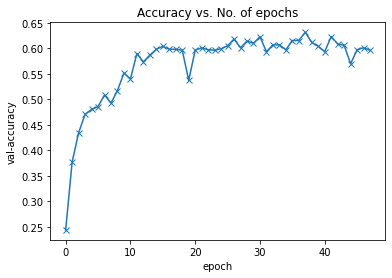

In [ ]:
plot_accuracies(history)

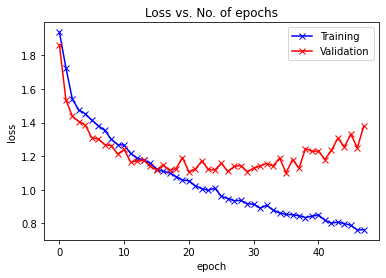

In [ ]:
plot_losses(history)

In [ ]:
model = load_model(CNN_Classification,'best_model.pt')

best_model.pt loaded.


In [ ]:
ytest = get_labels(model,test_set)
ypred = get_prediction(model,test_set)

acc   = accuracy_score(ytest,ypred) 
C     = confusion_matrix(ytest,ypred)

print('Performance on Testing subset:')
print('Accuracy:')
print(acc)
print(' ')
print('Confusion Matrix = ')
print(C)

Performance on Testing subset:
Accuracy:
0.5714285714285714
 
Confusion Matrix = 
[[10 10  6  1  2  1  0]
 [ 5 18  1  2  1  2  1]
 [ 2  6 14  1  4  2  1]
 [ 0  8  2 17  1  2  0]
 [ 2  1  6  1 16  4  0]
 [ 0  2  1  0  6 20  1]
 [ 1  0  0  0  2  2 25]]


In [ ]:
C1,acc1 = performance(model,train_set,'Training')
C2,acc2 = performance(model,val_set,'Validation')
C3,acc3 = performance(model,test_set,'Testing')

Training Confusion Matrix = 
[[ 751  162   52   50   16   17    2]
 [  73  851   39   49   13   22    3]
 [  63   76  683   23  115   84    6]
 [  12   36    9  986    2    5    0]
 [  46   23   93   13  795   80    0]
 [  14   28   80    9  144  770    5]
 [   2   10    0    6    5    2 1025]]
 
Training Accuracy = 0.7974
 
Validation Confusion Matrix = 
[[ 52  34  14  22  18   5   5]
 [ 12  90  14  26   2   1   5]
 [ 12  20  79   4  13  20   2]
 [ 15  11   4 110  10   0   0]
 [ 14   8  19   4  89  14   2]
 [  3   8  11   7  14 104   3]
 [  0   4   0   0   0   7 139]]
 
Validation Accuracy = 0.6314
 
Testing Confusion Matrix = 
[[10 10  6  1  2  1  0]
 [ 5 18  1  2  1  2  1]
 [ 2  6 14  1  4  2  1]
 [ 0  8  2 17  1  2  0]
 [ 2  1  6  1 16  4  0]
 [ 0  2  1  0  6 20  1]
 [ 1  0  0  0  2  2 25]]
 
Testing Accuracy = 0.5714
 
